<a href="https://colab.research.google.com/github/vaishnavimule/Humidity_ARIMA/blob/main/humidity_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install chart-studio

     |████████████████████████████████| 71kB 3.6MB/s 


# Credits
1. For code and notebook - https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series
2. For timeseries definitions - https://www.influxdata.com/what-is-time-series-data/
3. For timeseries properties - https://analyticsindiamag.com/an-overview-of-autocorrelation-seasonality-and-stationarity-in-time-series-data/ ; https://financetrain.com/characteristics-of-time-series/ ; https://www.dummies.com/programming/big-data/data-science/key-properties-of-a-time-series-in-data-analysis/
4. For time series models - https://online.stat.psu.edu/stat510/lesson/1/1.1 ; https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

# <a id='0'>Time Series Analysis</a>
<a href='#1'>1. What is time series data?</a><br>
<a href='#2'>2. Overview of problems where time series is used.</a><br>
<a href='#3'>3. Learning through code!</a><br>


## <a href='#1'>1. What is time series data?</a>
Time series data, also referred to as time-stamped data, is a sequence of data points indexed in time order. Time-stamped is data collected at different points in time. These data points typically consist of successive measurements made from the same source over a time interval and are used to track change over time.

This kind of data if you look closely is everywhere, with more and more sensors and trackers in our everyday systems ranging from weather data, heart rate monitors, fitness trackers, health and metric logs of servers and many more.

As a rule of thumb any sequential data which is changing with time can be called time series data. Although it is a generalisation with other categories present like cross-sectional and panel data, for sake of simplicity we will call them time series data. Attaching a resource for more information.

## <a href='#2'>2. Overview of problems where time series is used.</a>
1. Stock prices and other economic indicators
2. Weather data analysis and prediction( humidity, temperature prediction, storm analysis)
3. Health and fitness tracking data( heart rate, human activity recognition)
4. Transportation data( analysis of reasons for delay, performance and maintainance indicators analysis)
5. Devops logs and health data( developing an AIOPS solution for use cases like anomaly detection, prediction of failures, distinguish between actual failures and warnings )
6. Sports Analysis( player/team form analysis, calculating performance ratings, predicting next match outcome)

*Note* - .etc is implied in all these examples, also time series is just one step among many to properly analyse these problems<br><br>
Find your next datasets here! - https://data.world/datasets/time-series

## <a href='#3'>3. Learning through code!</a>
- <a href='#3.1'>3.1. Introduction to date and time</a>
    - <a href='#3.1.1'>3.1.1 Importing time series data</a>
    - <a href='#3.1.2'>3.1.2 Cleaning and preparing time series data</a>
    - <a href='#3.1.3'>3.1.3 Visualizing the datasets</a>
    - <a href='#3.1.4'>3.1.4 Timestamps and Periods</a>
    - <a href='#3.1.5'>3.1.5 Using date_range</a>
    - <a href='#3.1.6'>3.1.6 Using to_datetime</a>
    - <a href='#3.1.7'>3.1.7 Shifting and lags</a>
    - <a href='#3.1.8'>3.1.8 Resampling</a>
- <a href='#3.2'>3.2. Important Properties of Time Series</a>
    - <a href='#3.2.1'>3.2.1 Autocorrelation and Partial Autocorrelation</a>
    - <a href='#3.2.2'>3.2.2 Trends, Seasonality and Noise</a>
    - <a href='#3.2.3'>3.2.3 White Noise</a>
    - <a href='#3.2.4'>3.2.4 Random Walk</a>
    - <a href='#3.2.5'>3.2.5 Stationarity</a>
- <a href='#3.3'>3.3. Modelling using statsmodels</a>
    - <a href='#3.3.1'>3.3.1 AR models</a>
    - <a href='#3.3.2'>3.3.2 MA models</a>
    - <a href='#3.3.3'>3.3.3 ARMA models</a>
    - <a href='#3.3.4'>3.3.4 ARIMA models</a>
- <a href='#3.4'>3.4. Finance and Statistics</a>
    - <a href='#3.4.1'>3.4.1 Percent change</a>
    - <a href='#3.4.2'>3.4.2 Stock returns</a>
    - <a href='#3.4.3'>3.4.3 Absolute change in successive rows</a>
    - <a href='#3.4.4'>3.4.4 Comaring two or more time series</a>
    - <a href='#3.4.5'>3.4.5 Window functions</a>
    - <a href='#3.4.6'>3.4.6 OHLC charts</a>
    - <a href='#3.4.7'>3.4.7 Candlestick charts</a>

## <a id='3.1.1'> 3.1.1 Importing time series data</a>

In [3]:
# Importing libraries
# check which ones you really need remove unused imports
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
print(os.listdir("../content"))

['.config', 'sample_data']


### How to import data?
First, we import all the datasets needed for this kernel. The required time series column is imported as a datetime column using **parse_dates** parameter and is also selected as index of the dataframe using **index_col** parameter. 
#### Data being used:-
1. Google  Stocks Data
2. Humidity in different world cities
3. Microsoft  Stocks Data
3. Pressure in different world cities

In [4]:
from google.colab import files
uploaded = files.upload()

Saving humidity.csv to humidity.csv


In [5]:
humidity = pd.read_csv('../content/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,37.0,45.0,68.0,32.0,31.0,32.0,52.0,32.0,32.0,82.0,39.0,47.0,21.0,NaN,20.0,45.0,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,35.0,42.0,73.0,27.0,31.0,37.0,65.0,34.0,32.0,73.0,39.0,47.0,21.0,NaN,23.0,48.0,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,38.0,42.0,50.0,27.0,30.0,37.0,96.0,36.0,39.0,77.0,42.0,53.0,24.0,NaN,27.0,52.0,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,37.0,45.0,49.0,30.0,35.0,46.0,75.0,39.0,52.0,82.0,52.0,73.0,38.0,NaN,36.0,64.0,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,48.0,42.0,52.0,32.0,38.0,46.0,86.0,41.0,52.0,100.0,56.0,88.0,41.0,NaN,42.0,60.0,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


## <a id='3.1.2'>3.1.2 Cleaning and preparing time series data</a>

### How to prepare data?
Google stocks data doesn't have any missing values but humidity data does have its fair share of missing values. It is cleaned using **fillna()** method with **ffill** parameter which propagates last valid observation to fill gaps

In [6]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,92.0,86.0,88.0,69.0,65.0,71.0,69.0,99.0,76.0,94.0,74.0,86.0,87.0,81.0,93.0,76.0,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


## <a id='3.1.3'>3.1.3 Visualizing the datasets</a>

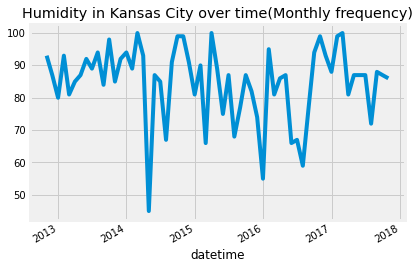

In [7]:
humidity["Portland"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

# Dip in 2014- Cold wave in NA

In [ ]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

## <a id='3.1.4'>3.1.4 Timestamps and Periods</a>

### What are timestamps and periods and how are they useful?
Timestamps are used to represent a point in time. Periods represent an interval in time. Periods can used to check if a specific event in the given period. They can also be converted to each other's form.

In [8]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [9]:
# Creating a period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [10]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [11]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [12]:
new_period.start_time

Timestamp('2017-01-01 12:00:00')

In [13]:
new_period.end_time

Timestamp('2017-01-01 12:59:59.999999999')

In [14]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

## <a id='3.1.5'>3.1.5 Using date_range</a>

### What is date_range and how is it useful?
**date_range** is a method that returns  a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [15]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [16]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [17]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

## <a id='3.1.6'>3.1.6 Using to_datetime</a> 

pandas.to_datetime() is used for converting arguments to datetime. Here, a DataFrame is converted to a datetime series.

In [19]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [20]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [21]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

## <a id='3.1.7'>3.1.7 Shifting and lags</a>

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself

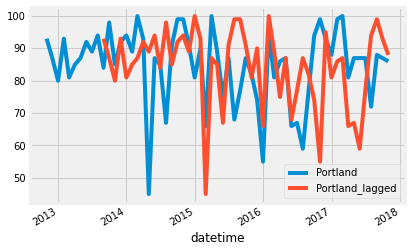

In [22]:
humidity["Portland"].asfreq('M').plot(legend=True)
shifted = humidity["Portland"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Portland','Portland_lagged'])
plt.show()

## <a id='#3.1.8'>3.1.8 Resampling</a>
**Upsampling** - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

**Downsampling** - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.


In [24]:
# Let's use pressure data to demonstrate this
pressure = pd.read_csv('../content/humidity.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,37.0,45.0,68.0,32.0,31.0,32.0,52.0,32.0,32.0,82.0,39.0,47.0,21.0,NaN,20.0,45.0,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,35.0,42.0,73.0,27.0,31.0,37.0,65.0,34.0,32.0,73.0,39.0,47.0,21.0,NaN,23.0,48.0,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,38.0,42.0,50.0,27.0,30.0,37.0,96.0,36.0,39.0,77.0,42.0,53.0,24.0,NaN,27.0,52.0,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,37.0,45.0,49.0,30.0,35.0,46.0,75.0,39.0,52.0,82.0,52.0,73.0,38.0,NaN,36.0,64.0,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,48.0,42.0,52.0,32.0,38.0,46.0,86.0,41.0,52.0,100.0,56.0,88.0,41.0,NaN,42.0,60.0,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


Sigh! A lot of cleaning is required.

In [25]:
humidity = pressure.iloc[1:]
humidity = pressure.fillna(method='ffill')
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,87.0,81.0,22.0,93.0,24.0,72.0,18.0,68.0,37.0,18.0,37.0,45.0,68.0,32.0,31.0,32.0,52.0,32.0,32.0,82.0,39.0,47.0,21.0,57.0,20.0,45.0,27.0,58.0,64.0,37.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 21:00:00,87.0,71.0,22.0,87.0,21.0,72.0,18.0,73.0,34.0,12.0,35.0,42.0,73.0,27.0,31.0,37.0,65.0,34.0,32.0,73.0,39.0,47.0,21.0,57.0,23.0,48.0,29.0,58.0,59.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 22:00:00,87.0,71.0,22.0,93.0,23.0,68.0,17.0,60.0,32.0,15.0,38.0,42.0,50.0,27.0,30.0,37.0,96.0,36.0,39.0,77.0,42.0,53.0,24.0,57.0,27.0,52.0,31.0,58.0,66.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 23:00:00,87.0,71.0,22.0,87.0,14.0,63.0,17.0,33.0,30.0,28.0,37.0,45.0,49.0,30.0,35.0,46.0,75.0,39.0,52.0,82.0,52.0,73.0,38.0,57.0,36.0,64.0,26.0,58.0,58.0,56.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-30 00:00:00,87.0,76.0,22.0,75.0,56.0,72.0,17.0,23.0,34.0,31.0,48.0,42.0,52.0,32.0,38.0,46.0,86.0,41.0,52.0,100.0,56.0,88.0,41.0,57.0,42.0,60.0,32.0,58.0,58.0,56.0,57.0,60.0,100.0,96.0,96.0,60.0


In [26]:
humidity = pressure.fillna(method='bfill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,25.0,51.0,51.0,50.0
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


First, we used **ffill** parameter which propagates last valid observation to fill gaps. Then we use **bfill** to propogate next valid observation to fill gaps.

In [27]:
# Shape before resampling(downsampling)
humidity.shape

(45253, 36)

In [28]:
# We downsample from hourly to 3 day frequency aggregated using mean
humidity = humidity.resample('3D').mean()
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01,75.216667,68.600000,61.900000,65.083333,61.516667,66.266667,16.416667,21.300000,38.833333,50.833333,79.266667,64.966667,67.566667,58.650000,53.216667,67.166667,58.216667,89.533333,82.516667,90.000000,63.933333,79.350000,86.900000,81.633333,82.650000,59.933333,67.016667,58.650000,66.033333,75.516667,70.266667,71.350000,37.100000,59.350000,59.500000,56.016667
2012-10-04,44.472222,43.944444,67.791667,48.111111,70.638889,72.791667,16.875000,23.583333,19.527778,43.666667,69.027778,58.250000,73.458333,60.763889,50.652778,73.680556,68.222222,74.805556,78.333333,75.500000,70.138889,85.013889,74.833333,76.652778,69.041667,68.944444,80.819444,86.250000,88.277778,75.597222,66.013889,65.000000,48.097222,68.916667,68.916667,65.041667
2012-10-07,56.500000,42.500000,72.611111,54.250000,74.680556,71.402778,19.486111,26.638889,37.791667,57.236111,71.527778,61.888889,71.486111,57.375000,50.680556,64.888889,46.111111,63.416667,68.638889,75.472222,66.805556,80.458333,77.458333,78.972222,70.486111,62.541667,70.222222,66.097222,65.208333,76.708333,62.527778,64.625000,40.319444,64.361111,64.361111,61.791667
2012-10-10,80.694444,64.902778,71.361111,69.972222,66.597222,65.402778,38.555556,32.013889,27.958333,39.833333,73.041667,76.083333,77.125000,54.583333,51.013889,62.208333,51.013889,63.430556,60.083333,73.652778,53.458333,77.236111,70.319444,73.041667,63.625000,59.097222,65.930556,67.722222,61.375000,75.513889,56.361111,64.152778,35.041667,63.055556,63.055556,56.527778
2012-10-13,90.305556,83.652778,73.541667,81.819444,64.013889,65.972222,59.305556,39.611111,41.680556,57.750000,74.388889,70.472222,79.638889,69.972222,65.875000,74.888889,65.875000,78.180556,66.402778,67.833333,69.902778,70.430556,69.041667,66.305556,51.888889,73.055556,54.250000,55.291667,66.902778,66.513889,66.027778,67.166667,41.263889,63.486111,63.486111,57.805556


In [29]:
# Shape after resampling(downsampling)
humidity.shape

(629, 36)

Much less rows are left. Now, we will upsample from 3 day frequency to daily frequency

In [30]:
humidity = humidity.resample('D').pad()
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01,75.216667,68.600000,61.900000,65.083333,61.516667,66.266667,16.416667,21.300000,38.833333,50.833333,79.266667,64.966667,67.566667,58.650000,53.216667,67.166667,58.216667,89.533333,82.516667,90.0,63.933333,79.350000,86.900000,81.633333,82.650000,59.933333,67.016667,58.65,66.033333,75.516667,70.266667,71.35,37.100000,59.350000,59.500000,56.016667
2012-10-02,75.216667,68.600000,61.900000,65.083333,61.516667,66.266667,16.416667,21.300000,38.833333,50.833333,79.266667,64.966667,67.566667,58.650000,53.216667,67.166667,58.216667,89.533333,82.516667,90.0,63.933333,79.350000,86.900000,81.633333,82.650000,59.933333,67.016667,58.65,66.033333,75.516667,70.266667,71.35,37.100000,59.350000,59.500000,56.016667
2012-10-03,75.216667,68.600000,61.900000,65.083333,61.516667,66.266667,16.416667,21.300000,38.833333,50.833333,79.266667,64.966667,67.566667,58.650000,53.216667,67.166667,58.216667,89.533333,82.516667,90.0,63.933333,79.350000,86.900000,81.633333,82.650000,59.933333,67.016667,58.65,66.033333,75.516667,70.266667,71.35,37.100000,59.350000,59.500000,56.016667
2012-10-04,44.472222,43.944444,67.791667,48.111111,70.638889,72.791667,16.875000,23.583333,19.527778,43.666667,69.027778,58.250000,73.458333,60.763889,50.652778,73.680556,68.222222,74.805556,78.333333,75.5,70.138889,85.013889,74.833333,76.652778,69.041667,68.944444,80.819444,86.25,88.277778,75.597222,66.013889,65.00,48.097222,68.916667,68.916667,65.041667
2012-10-05,44.472222,43.944444,67.791667,48.111111,70.638889,72.791667,16.875000,23.583333,19.527778,43.666667,69.027778,58.250000,73.458333,60.763889,50.652778,73.680556,68.222222,74.805556,78.333333,75.5,70.138889,85.013889,74.833333,76.652778,69.041667,68.944444,80.819444,86.25,88.277778,75.597222,66.013889,65.00,48.097222,68.916667,68.916667,65.041667


In [31]:
# Shape after resampling(upsampling)
humidity.shape

(1885, 36)

Again an increase in number of rows. Resampling is cool when used properly.

# <a id='3.2'>3.2. Important Properties of Time Series</a>

# Important properties of time series

1. **Trend Component** - A trend is a long-run increase or decrease in a time series
2. **Seasonal Component or Seasonality** - Seasonal Component refers to the repeating cycle over a specific period (such as week, month, etc.) in the time series. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period. 
3. **Cyclical Component** - A cyclic pattern exists when data exhibit rises and falls that are not of fixed period. In general, the average length of cycles is longer than the length of a seasonal pattern, and the magnitude of cycles tends to be more variable than the magnitude of seasonal patterns.
4. **Auto-correlation** - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
5. **Stationarity** - A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant mean and variance, and covariance is independent of time. Eg - White Noise

## <a id='3.2.1'>3.2.1 Autocorrelation and Partial Autocorrelation</a>
* Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
* Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags.  The terms can be interpreted the same way as a standard  linear regression, that is the contribution of a change in that particular lag while holding others constant. 

Source: [Quora](https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series)

## Autocorrelation

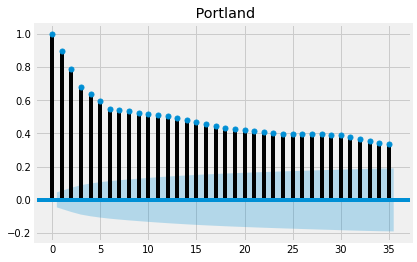

In [35]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["Portland"],lags=35,title=" Portland")
plt.show()

 As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

## Partial Autocorrelation

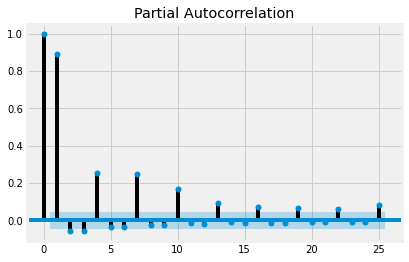

In [36]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["Portland"],lags=25)
plt.show()

Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

## <a id='3.2.2'>3.2.2. Trends, seasonality and noise</a>
These are the components of a time series
* Trend - Consistent upwards or downwards slope of a time series
* Seasonality - Clear periodic pattern of a time series(like sine funtion)
* Noise - Outliers or missing values

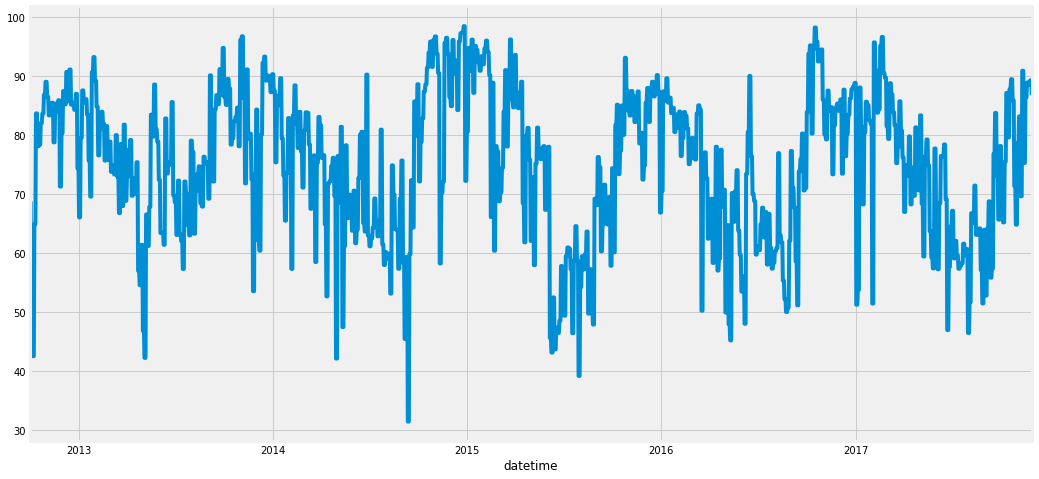

In [39]:
# Let's take Google stocks High for this
humidity["Portland"].plot(figsize=(16,8))

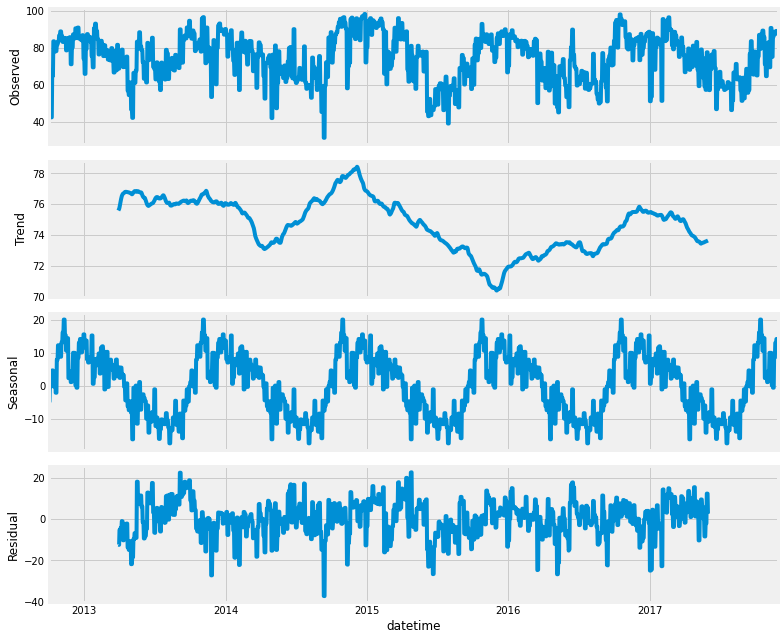

In [42]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_humidity = sm.tsa.seasonal_decompose(humidity["Portland"],freq=360) # The frequncy is annual
figure = decomposed_humidity.plot()
plt.show()

* There is clearly an upward trend in the above plot.
* You can also see the uniform seasonal change.
* Non-uniform noise that represent outliers and missing values

## <a id='3.2.3'>3.2.3. White noise</a>
White noise has...
* Constant mean
* Constant variance
* Zero auto-correlation at all lags

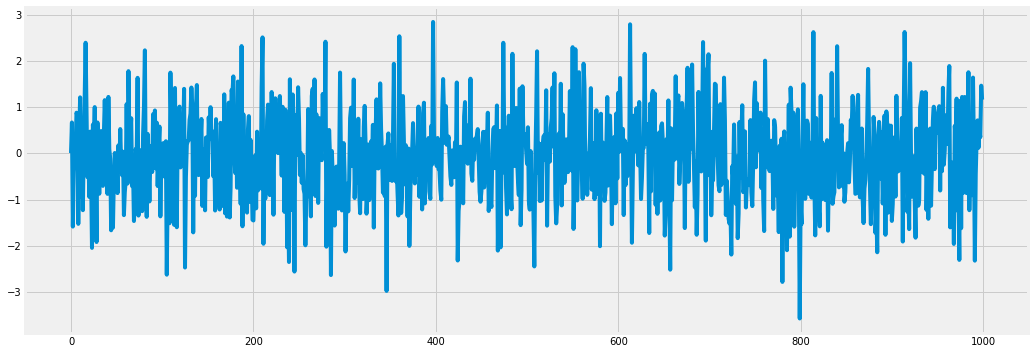

In [43]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

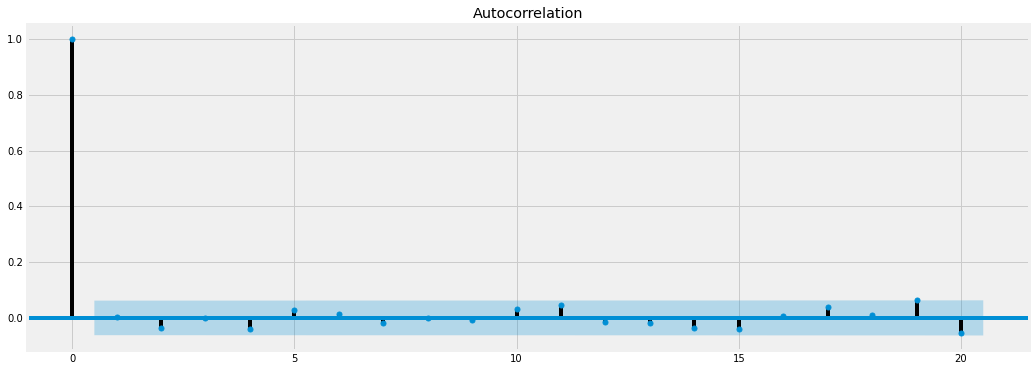

In [44]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

See how all lags are statistically insigficant as they lie inside the confidence interval(shaded portion).

## <a id='3.2.4'>3.2.4. Random Walk</a>
A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. 

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

# P<sub>t</sub> = P<sub>t-1</sub> + ε<sub>t</sub> 

Random walks can't be forecasted because well, noise is random.

Random Walk with Drift(drift(μ) is zero-mean)
#### P<sub>t</sub> - P<sub>t-1</sub> = μ + ε<sub>t</sub> 
<br>
Regression test for random walk 
#### P<sub>t</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
#### Equivalent to  P<sub>t</sub> - P<sub>t-1</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
<br>
Test:
#### H<sub>0</sub>: β = 1 (This is a random walk)
#### H<sub>1</sub>: β < 1 (This is not a random walk)
<br>
Dickey-Fuller Test:
#### H<sub>0</sub>: β = 0 (This is a random walk)
#### H<sub>1</sub>: β < 0 (This is not a random walk)

### Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [45]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(humidity["Portland"])
print("p-value of humidity: {}".format(float(adf[1])))


p-value of humidity: 0.002931752363551637


##### As microsoft has p-value 0.0003201525 which is less than 0.05, null hypothesis is rejected and this is not a random walk.
##### Now google has p-value 0.0000006510 which is more than 0.05, null hypothesis is rejected and this is not a  random walk.

### Generating a random walk

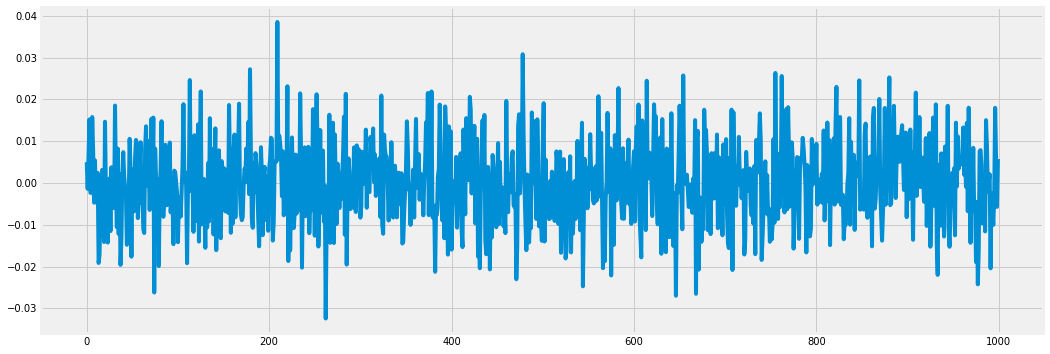

In [46]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [48]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
fig.show()
random_walk_adf = adfuller(random_walk)
print("p-value of random_walk: {}".format(float(random_walk_adf[1])))
iplot(fig, filename='Basic Distplot')

p-value of random_walk: 0.0


## <a id='3.2.5'>3.2.5 Stationarity</a>
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
* Strong stationarity:  is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
* Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as  non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

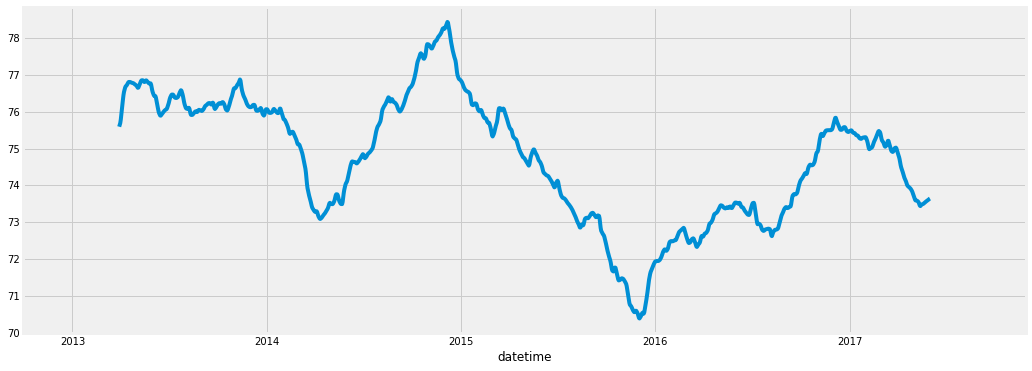

In [49]:
# The original non-stationary plot
decomposed_humidity.trend.plot()

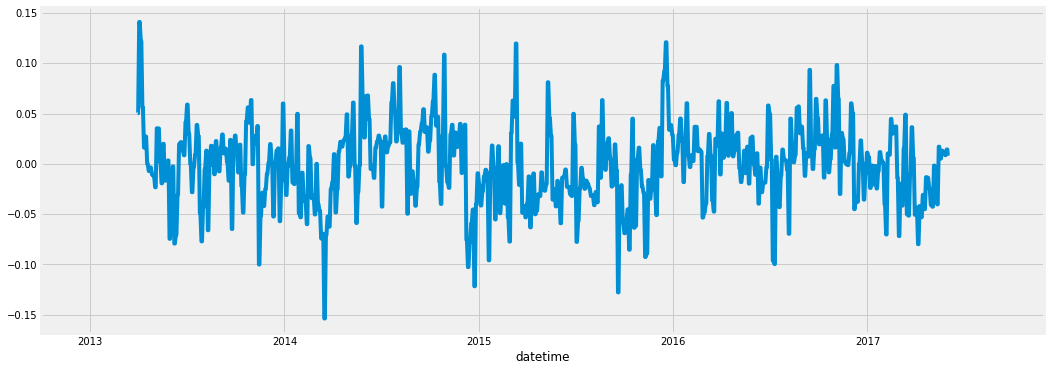

In [50]:
# The new stationary plot
decomposed_humidity.trend.diff().plot()

# <a id='3.3'>3.3. Modelling using statstools</a>

## <a id='3.3.1'>3.3.1 AR models</a>
 An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.
 #### AR(1) model
 R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ε<sub>t</sub>
 ##### As RHS has only one lagged value(R<sub>t-1</sub>)this is called AR model of order 1 where μ is mean and ε is noise at time t
 If ϕ = 1, it is random walk. Else if ϕ = 0, it is white noise. Else if -1 < ϕ < 1, it is stationary. If ϕ is -ve, there is mean reversion. If ϕ is +ve, there is momentum.
 #### AR(2) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ε<sub>t</sub>
 #### AR(3) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ϕ<sub>3</sub>R<sub>t-3</sub> + ε<sub>t</sub>

## Simulating AR(1) model

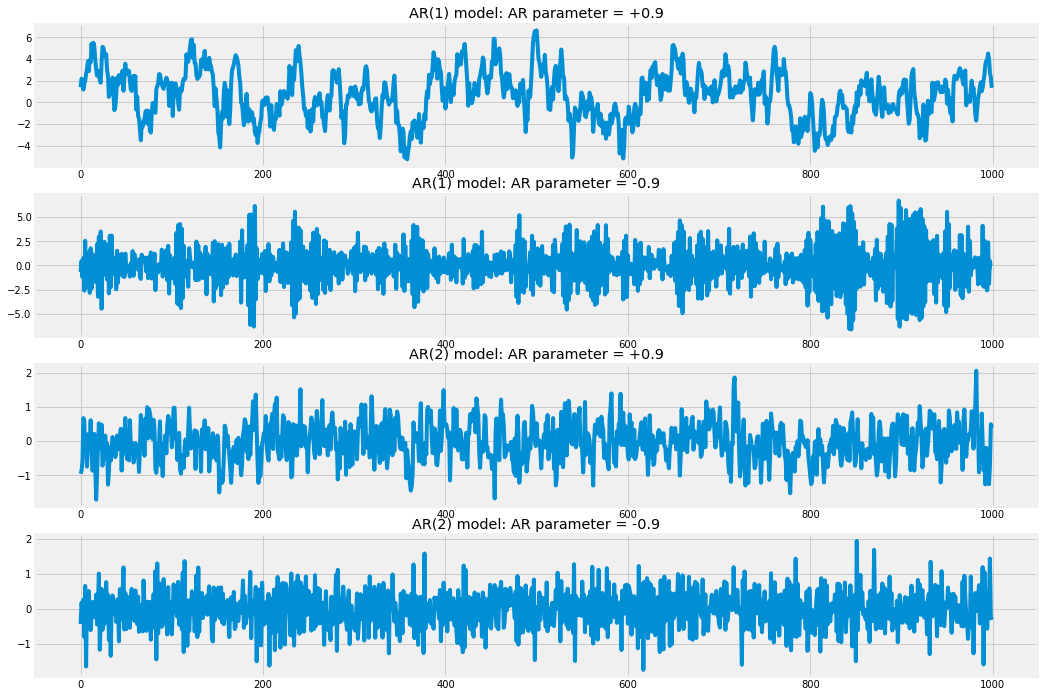

In [51]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

## Forecasting a simulated model

In [52]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))
# how is μ ,ϕ found out, which function is minimized or maximised? - minimising the rmse of value at time t and calculated value at t

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Sat, 19 Jun 2021   AIC                           2837.403
Time:                        10:25:01   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

## Predicting the models

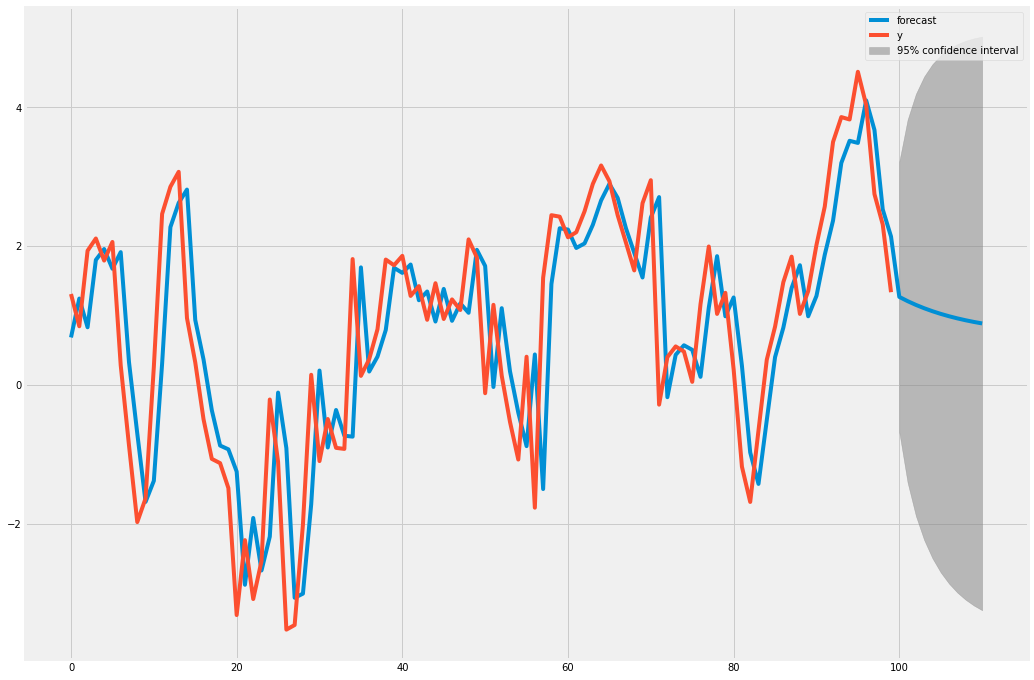

In [53]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [54]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054468092558.


y is predicted plot. Quite neat!

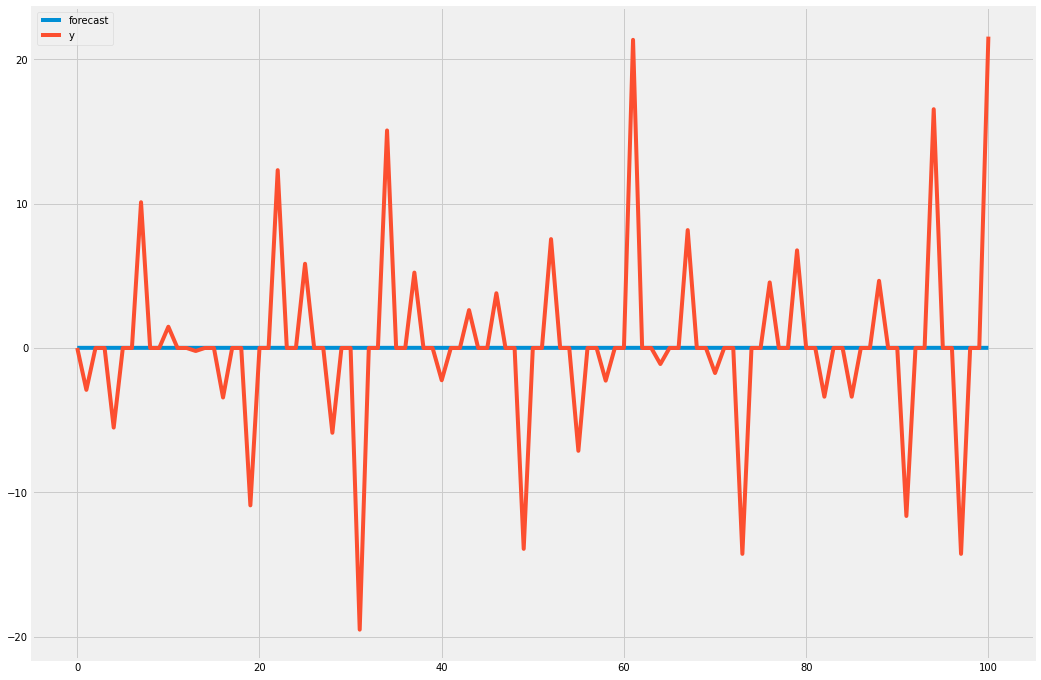

In [56]:
# Predicting humidity level of Montreal
humid = ARMA(humidity["Portland"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [57]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 7.666563598848158.


 Not quite impressive. But let's try google stocks. 

In [ ]:
# Predicting closing prices of google
humid = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=900, end=1010)
plt.show()

There are always better models.

## <a id='3.3.2'>3.3.2 MA models</a>
The moving-average (MA) model is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.
#### MA(1) model
R<sub>t</sub> = μ  +  ϵ<sub>t</sub>1 + θϵ<sub>t-1</sub>

It translates to Today's returns = mean + today's noise + yesterday's noise
##### As there is only 1 lagged value in RHS, it is an MA model of order 1

## Simulating MA(1) model

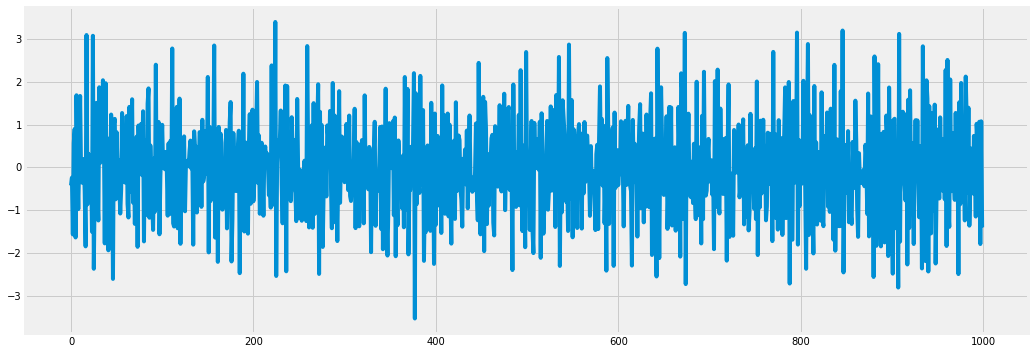

In [58]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

## Forecasting the simulated MA model

In [59]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1423.276
Method:                       css-mle   S.D. of innovations              1.004
Date:                Sat, 19 Jun 2021   AIC                           2852.553
Time:                        10:27:50   BIC                           2867.276
Sample:                             0   HQIC                          2858.148
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.014     -1.652      0.099      -0.050       0.004
ma.L1.y       -0.5650      0.027    -20.797      0.000      -0.618      -0.512
                                    Roots           

## Prediction using MA models

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1884
Model:                     ARMA(0, 3)   Log Likelihood               -5826.974
Method:                       css-mle   S.D. of innovations              5.331
Date:                Sat, 19 Jun 2021   AIC                          11663.947
Time:                        10:28:04   BIC                          11691.653
Sample:                             0   HQIC                         11674.151
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0143      0.049      0.294      0.769      -0.081       0.109
ma.L1.y    -7.958e-05      0.019     -0.004      0.997      -0.037       0.037
ma.L2.y    -7.957e-05      0.019     -0.004      0.9

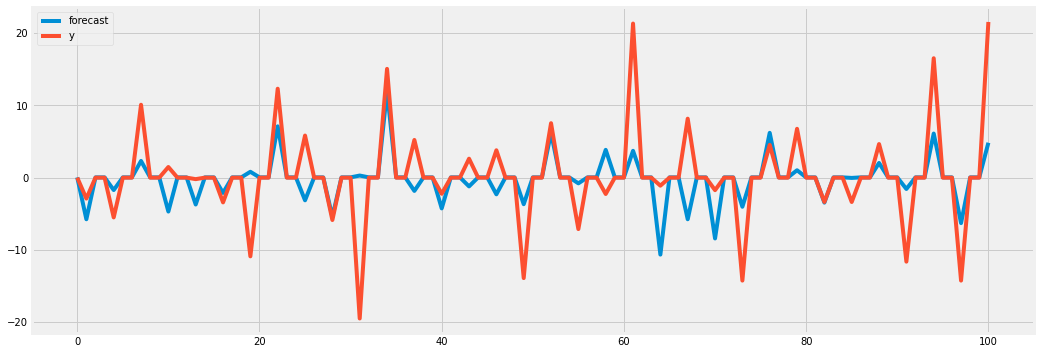

In [60]:
# Forecasting and predicting montreal humidity
model = ARMA(humidity["Portland"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [62]:
rmse = math.sqrt(mean_squared_error(humidity["Portland"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 6.0808079614492625.


Now, for ARMA models.

## <a id='3.3.3'>3.3.3 ARMA models</a>
Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.
### ARMA(1,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub> 
Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

## Prediction using ARMA models
I am not simulating any model because it's quite similar to AR and MA models. Just  forecasting and predictions for this one.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1884
Model:                     ARMA(3, 3)   Log Likelihood               -5788.967
Method:                       css-mle   S.D. of innovations              5.224
Date:                Sat, 19 Jun 2021   AIC                          11593.933
Time:                        10:28:45   BIC                          11638.262
Sample:                             0   HQIC                         11610.259
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.034      0.281      0.779      -0.057       0.076
ar.L1.y    -5.249e-05      0.033     -0.002      0.999      -0.065       0.065
ar.L2.y    -5.265e-05      0.033     -0.002      0.9

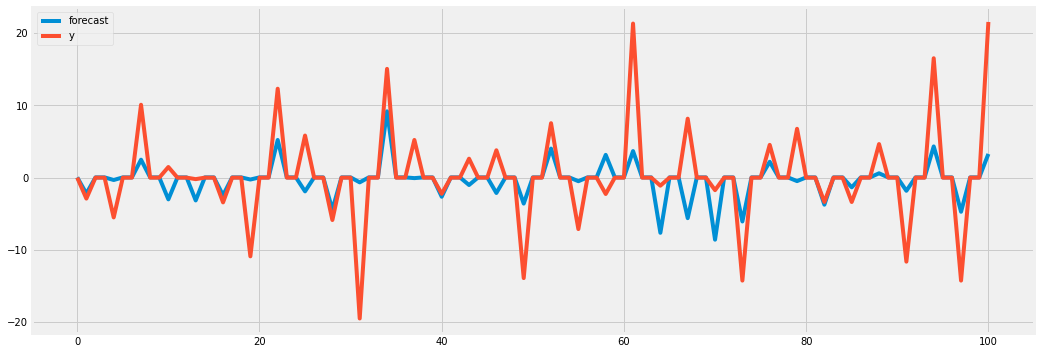

In [63]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(humidity["Portland"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [64]:
rmse = math.sqrt(mean_squared_error(humidity["Portland"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 5.827238549142743.


## <a id='3.3.4'>3.3.4 ARIMA models</a>
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.
ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter
### ARIMA(1,0,0)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub>**
### ARIMA(1,0,1)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>**
### ARIMA(1,1,1)
**Δy<sub>t</sub> = a<sub>1</sub>Δy<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>** where **Δy<sub>t</sub> = y<sub>t</sub> - y<sub>t-1</sub>**

## Prediction using ARIMA model

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1883
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -6379.003
Method:                       css-mle   S.D. of innovations              7.161
Date:                Sat, 19 Jun 2021   AIC                          12766.005
Time:                        10:29:56   BIC                          12788.168
Sample:                             1   HQIC                         12774.168
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.097      0.003      0.998      -0.190       0.190
ar.L1.D.y     -0.5670      0.023    -24.818      0.000      -0.612      -0.522
ar.L2.D.y     -0.1345      0.023     -5.876      0.0

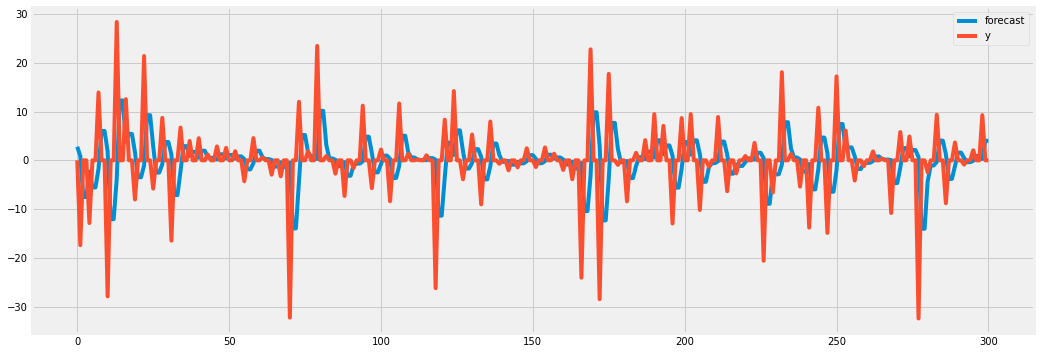

In [65]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(humidity["Portland"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [66]:
rmse = math.sqrt(mean_squared_error(humidity["Portland"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 10.75137388579504.


Taking the slight lag into account, this is a fine model.

## <a id='3.4.5'>3.4.5 Window functions</a>
Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

**Rolling** - Same size and sliding

**Expanding** - Contains all prior values

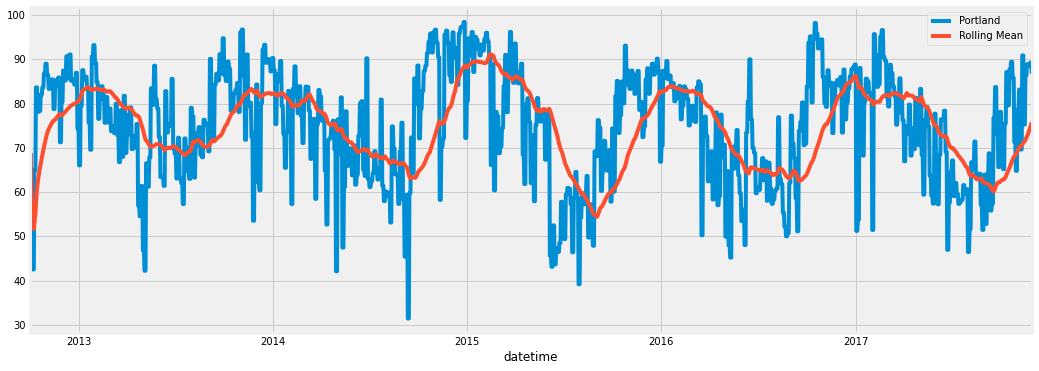

In [70]:
# Rolling window functions
rolling_google = humidity.Portland.rolling('90D').mean()
humidity.Portland.plot()
rolling_google.plot()
plt.legend(['Portland','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

Now, observe that rolling mean plot is a smoother version of the original plot.

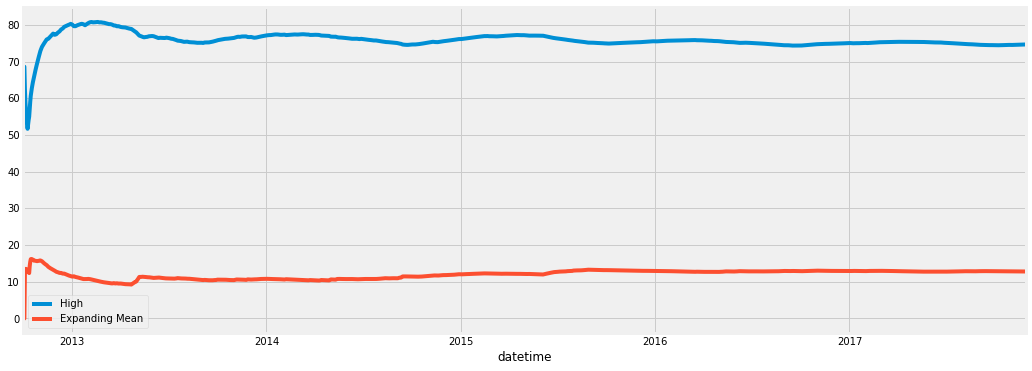

In [72]:
# Expanding window functions
humidity_mean =  humidity.Portland.expanding().mean()
humidity_std =  humidity.Portland.expanding().std()
#humidity.High.plot()
humidity_mean.plot()
humidity_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()